# 4/587 Data Intensive Computing Project Phase - 1

# Importing the dataset

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fifa_players_unclean3.csv', encoding='utf-8')

performed encoding = 'utf-8' as some characters arent readable

# 1. Initial insights of data

In [47]:
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,$Lionel Andrés Messi Cuccittini,1987/06/24,31,170.18,72.1,"CF,RW,ST",Argentin@,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992/02/14,27,154.94,76.2,"CAM,RM,CM",?Denm@rk,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993/03/15,25,190.50,83.9,"CM,CAM",Fr@nce,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,$Lorenzo Insigne,1991/06/04,27,162.56,59.0,"LW,ST",It@ly,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991/06/20,27,187.96,88.9,CB,Seneg@l,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,1991/07/08,27,193.04,92.1,CB,Netherl@nd&,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,1998/12/20,20,152.40,73.0,"RW,ST,RM",Fr@nce,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,1988/06/02,30,172.72,69.9,ST,Argentin@,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,$Manuel Neuer,1986/03/27,32,193.04,92.1,GK,Germ@ny,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,1987/02/14,32,185.42,77.1,ST,Urugu@y,89,89,...,79,84,48,93,77,85,82,52,45,39


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20860 entries, 0 to 20859
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           20860 non-null  object 
 1   full_name                      20860 non-null  object 
 2   birth_date                     20860 non-null  object 
 3   age                            20860 non-null  int64  
 4   height_cm                      20860 non-null  float64
 5   weight_kgs                     20860 non-null  float64
 6   positions                      20860 non-null  object 
 7   nationality                    20860 non-null  object 
 8   overall_rating                 20860 non-null  int64  
 9   potential                      20860 non-null  int64  
 10  value_euro                     20568 non-null  float64
 11  wage_euro                      20578 non-null  float64
 12  preferred_foot                 20860 non-null 

In [49]:
df.shape

(20860, 51)

In [50]:
df.count()

name                             20860
full_name                        20860
birth_date                       20860
age                              20860
height_cm                        20860
weight_kgs                       20860
positions                        20860
nationality                      20860
overall_rating                   20860
potential                        20860
value_euro                       20568
wage_euro                        20578
preferred_foot                   20860
international_reputation(1-5)    20860
weak_foot(1-5)                   20860
skill_moves(1-5)                 20860
body_type                        20860
release_clause_euro              18713
national_team                     1029
national_rating                   1029
national_team_position            1029
national_jersey_number            1029
crossing                         20860
finishing                        20860
heading_accuracy                 20860
short_passing            

# 2. Data Cleaning

## a. Finding duplicates

In [51]:
df.duplicated().sum()

2906

In [52]:
df = df.drop_duplicates()
df.shape

(17954, 51)

as the data has no duplicates, left as is

# Missing Values

In [53]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

## b. Dropping columns with very high missing values

In [54]:
df = df.drop(columns = ['national_team', 'national_rating', 'national_team_position', 'national_jersey_number'], axis = 1)
df.shape

(17954, 47)

## c. Filling release clause value with zero

In [55]:
df['release_clause_euro'] = df['release_clause_euro'].fillna(0)

## d. Filling value_euro and wage_euro with median

In [56]:
value_median =  df['value_euro'].median()
df['value_euro'].fillna(value_median, inplace=True)

/var/folders/0d/sb9vzr856xg8clnp6z8_j88h0000gn/T/ipykernel_37004/3261827611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value_euro'].fillna(value_median, inplace=True)


In [57]:
wage_median = df['wage_euro'].median()
df['wage_euro'].fillna(wage_median, inplace=True)

/var/folders/0d/sb9vzr856xg8clnp6z8_j88h0000gn/T/ipykernel_37004/822053199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wage_euro'].fillna(wage_median, inplace=True)


filled the null values in wages and value with median

## e. Formatting Nationality column

In [58]:
column_name = 'nationality'
df[column_name] = df[column_name].str.replace('@','a')
df[column_name] = df[column_name].str.replace('&', 's')

def format_nationality(country):
    if country.startswith('?'):
        return country.lstrip('?')
    else:
        return country
df[column_name] = df[column_name].apply(format_nationality)
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,$Lionel Andrés Messi Cuccittini,1987/06/24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992/02/14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993/03/15,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,$Lorenzo Insigne,1991/06/04,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991/06/20,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,1991/07/08,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,1998/12/20,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,1988/06/02,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,$Manuel Neuer,1986/03/27,32,193.04,92.1,GK,Germany,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,1987/02/14,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


## f. Formatting the full_name column

In [59]:
def format_full_name(name):
    if name.startswith('$'):
        return name.lstrip('$')
    elif name.startswith('..'):
        return name.lstrip('..')
    elif name.endswith('/'):
        return name.rstrip('/')
    else:
        return name
df['full_name'] = df['full_name'].apply(format_full_name)
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,1987/06/24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992/02/14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993/03/15,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,1991/06/04,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991/06/20,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,1991/07/08,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,1998/12/20,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,1988/06/02,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,1986/03/27,32,193.04,92.1,GK,Germany,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,1987/02/14,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


## g. Formatting the date column

On verification it is observed that in some rows the date is in yyyy/mm/dd and in some rows the date is in mm/dd/yyyy format. So the data should be appropriately cleaned

In [60]:
def format_date_column(date):
    date_format = pd.to_datetime(date)
    date_format = date_format.strftime('%m/%d/%y')
    return date_format
df['birth_date'] = df['birth_date'].apply(format_date_column)
df['birth_date'].head(10)

0    06/24/87
1    02/14/92
2    03/15/93
3    06/04/91
4    06/20/91
5    07/08/91
6    12/20/98
7    06/02/88
8    03/27/86
9    02/14/87
Name: birth_date, dtype: object

## h. Formatting body_type column

In [61]:
unique_body_type = df['body_type'].unique().tolist()
print(unique_body_type)
actual_body_type = ['Lean','Normal','Stocky']
mode = df['body_type'].mode()[0]
def format_body_type(body_type_var):
    if body_type_var not in actual_body_type:
        body_type_var = mode
    return body_type_var
    
df['body_type'] = df['body_type'].apply(format_body_type)

body_type_new = df['body_type'].unique().tolist()
print(body_type_new)

['Messi', 'Lean', 'Normal', 'Stocky', 'Courtois', 'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Shaqiri', 'Neymar', 'C. Ronaldo']
['Normal', 'Lean', 'Stocky']


In [62]:
df.to_csv('football_clean.csv', index = False)

## i. Adding a new variable Body Mass Index

In [63]:
df['body_mass_index'] = (df['weight_kgs']/(df['height_cm']/100)**2).round(2)
df.insert(6,'body_mass_index',df.pop('body_mass_index'))
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,body_mass_index,positions,nationality,overall_rating,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,06/24/87,31,170.18,72.1,24.90,"CF,RW,ST",Argentina,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,02/14/92,27,154.94,76.2,31.74,"CAM,RM,CM",Denmark,88,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,03/15/93,25,190.50,83.9,23.12,"CM,CAM",France,88,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,06/04/91,27,162.56,59.0,22.33,"LW,ST",Italy,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,06/20/91,27,187.96,88.9,25.16,CB,Senegal,88,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,07/08/91,27,193.04,92.1,24.72,CB,Netherlands,88,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/98,20,152.40,73.0,31.43,"RW,ST,RM",France,88,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,06/02/88,30,172.72,69.9,23.43,ST,Argentina,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,03/27/86,32,193.04,92.1,24.72,GK,Germany,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,02/14/87,32,185.42,77.1,22.43,ST,Uruguay,89,...,79,84,48,93,77,85,82,52,45,39


## j. Creating a primary_position column

The dataset is from sofascore where the primary position is given first and then secondary positions are added in the list next to it. So extracting the primary poisition into a new column so it is useful for our analysis

In [64]:
df['primary_position'] = df['positions'].str.split(',').str[0]
df.insert(8,'primary_position',df.pop('primary_position'))
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,body_mass_index,positions,primary_position,nationality,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,06/24/87,31,170.18,72.1,24.90,"CF,RW,ST",CF,Argentina,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,02/14/92,27,154.94,76.2,31.74,"CAM,RM,CM",CAM,Denmark,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,03/15/93,25,190.50,83.9,23.12,"CM,CAM",CM,France,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,06/04/91,27,162.56,59.0,22.33,"LW,ST",LW,Italy,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,06/20/91,27,187.96,88.9,25.16,CB,CB,Senegal,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,07/08/91,27,193.04,92.1,24.72,CB,CB,Netherlands,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/98,20,152.40,73.0,31.43,"RW,ST,RM",RW,France,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,06/02/88,30,172.72,69.9,23.43,ST,ST,Argentina,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,03/27/86,32,193.04,92.1,24.72,GK,GK,Germany,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,02/14/87,32,185.42,77.1,22.43,ST,ST,Uruguay,...,79,84,48,93,77,85,82,52,45,39


## k. Performing feature engineering to extract more features and dropping other columns

In [65]:
df.shape

(17954, 49)

In [66]:
set_piece_columns = ['crossing', 'long_passing', 'curve', 'penalties']
df['setpiece_stats'] =df[set_piece_columns].mean(axis = 1).round(2)

In [67]:
attacking_columns = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys']
df['attacking_stats'] = df[attacking_columns].mean(axis = 1).round(2)
df = df.drop(attacking_columns, axis = 1)

In [68]:
skill_columns = ['dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control']
df['skill_stats'] = df[skill_columns].mean(axis = 1).round(2)
df = df.drop(skill_columns, axis = 1)

In [69]:
movement_columns = ['acceleration','sprint_speed', 'agility', 'reactions', 'balance']
df['movement_stats'] = df[movement_columns].mean(axis = 1).round(2)
df = df.drop(movement_columns, axis = 1)

In [70]:
power_columns = ['shot_power', 'jumping', 'stamina', 'strength', 'long_shots']
df['power_stats'] = df[power_columns].mean(axis = 1).round(2)
df = df.drop(power_columns, axis = 1)

In [71]:
mentality_columns = ['aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure']
df['mentality_stats'] = df[mentality_columns].mean(axis = 1).round(2)
df = df.drop(mentality_columns, axis = 1)

In [72]:
defending_columns = ['marking', 'standing_tackle', 'sliding_tackle']
df['defending_stats'] = df[defending_columns].mean(axis = 1).round(2)
df = df.drop(defending_columns, axis = 1)

In [73]:
df.shape

(17954, 27)

In [74]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'body_mass_index', 'positions', 'primary_position', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro',
       'setpiece_stats', 'attacking_stats', 'skill_stats', 'movement_stats',
       'power_stats', 'mentality_stats', 'defending_stats'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## 1. Five number summary

In [75]:
descriptive_stats_columns = ['age', 'body_mass_index', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'release_clause_euro', 'attacking_stats', 'skill_stats', 'movement_stats', 'power_stats', 'mentality_stats', 'defending_stats']
df[descriptive_stats_columns].describe().loc[['min','25%', '50%', '75%', 'max']].round(2)

,age,body_mass_index,overall_rating,potential,value_euro,wage_euro,release_clause_euro,attacking_stats,skill_stats,movement_stats,power_stats,mentality_stats,defending_stats
min,17.0,16.95,47.0,48.0,10000.0,1000.0,0.0,7.6,8.6,24.0,20.8,10.50,5.00
25%,22.0,22.37,62.0,67.0,325000.0,1000.0,363000.0,44.2,43.8,57.8,53.2,46.50,27.67
50%,25.0,23.47,66.0,71.0,700000.0,3000.0,971000.0,52.8,54.0,65.6,60.8,53.83,52.67
75%,29.0,27.03,71.0,75.0,2000000.0,9000.0,2900000.0,59.8,62.2,71.6,67.2,60.50,64.33
max,46.0,47.45,94.0,95.0,110500000.0,565000.0,226500000.0,87.0,93.8,92.2,90.0,84.00,92.33


## 2. Analysis of outliers

In [76]:
#Calculation of outliers in market value and wage values
#for value_euro
Q1 = df['value_euro'].quantile(0.25)
Q3 = df['value_euro'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers_value = df[(df['value_euro'] < Q1 - threshold * IQR) | (df['value_euro'] > Q3 + threshold * IQR)].count()

In [77]:
#for wage_euro
Q1 = df['wage_euro'].quantile(0.25)
Q3 = df['wage_euro'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers_wage = df[(df['wage_euro'] < Q1 - threshold * IQR) | (df['wage_euro'] > Q3 + threshold * IQR)].count()

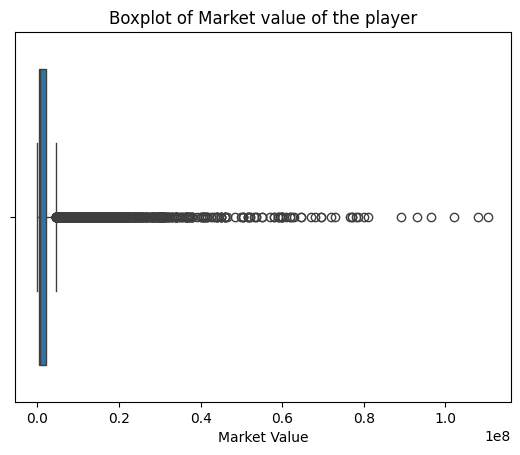

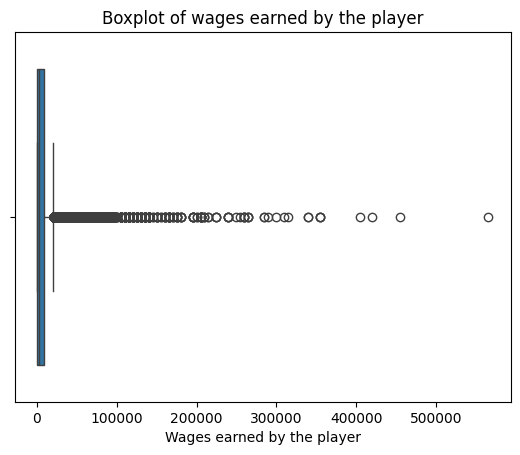

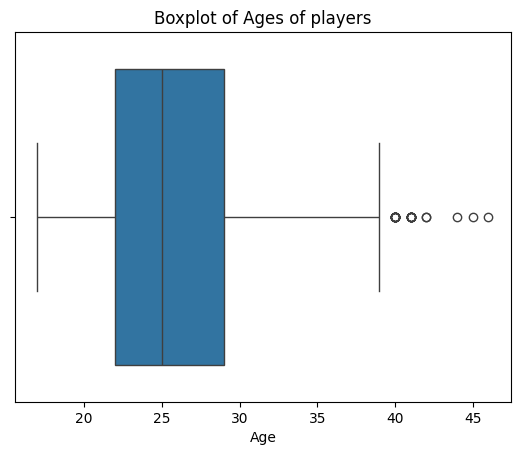

In [78]:
sns.boxplot(data=df, x='value_euro')
plt.xlabel('Market Value')
plt.title('Boxplot of Market value of the player')
plt.show()

sns.boxplot(data=df, x='wage_euro')
plt.xlabel('Wages earned by the player')
plt.title('Boxplot of wages earned by the player')
plt.show()

sns.boxplot(data=df, x='age')
plt.xlabel('Age')
plt.title('Boxplot of Ages of players')
plt.show()

## 3. Analysis of key features (univariate analysis)

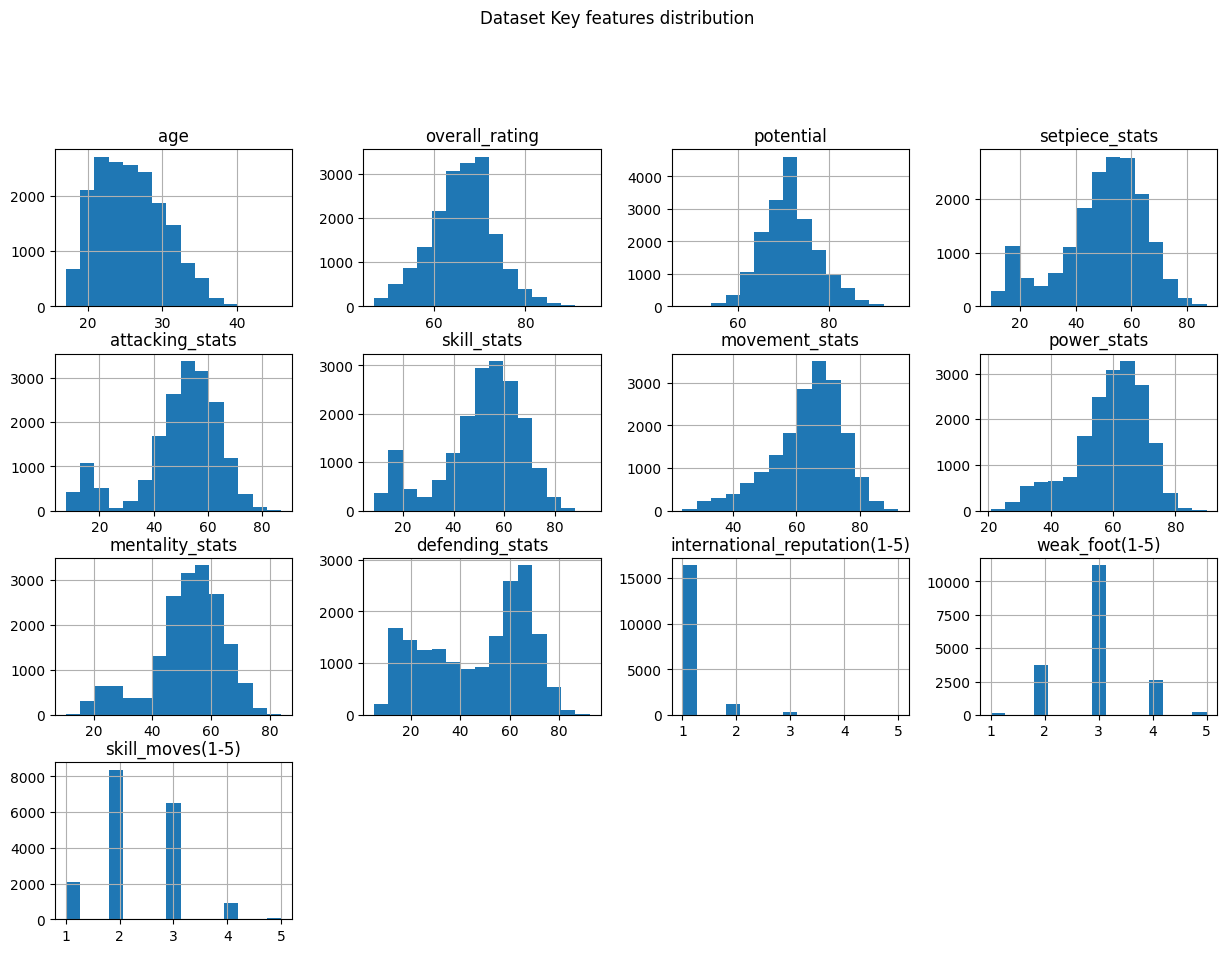

In [79]:
key_features = ['age', 'overall_rating', 'potential', 'setpiece_stats', 'attacking_stats', 'skill_stats', 
                'movement_stats', 'power_stats', 'mentality_stats', 'defending_stats', 
                'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)']
df[key_features].hist(bins=15, figsize=(15, 10), layout=(4,4))
plt.suptitle("Dataset Key features distribution", y =1.02)
plt.show()

## 4. Scatterplot wages vs setpieces, attacking, defending, skills

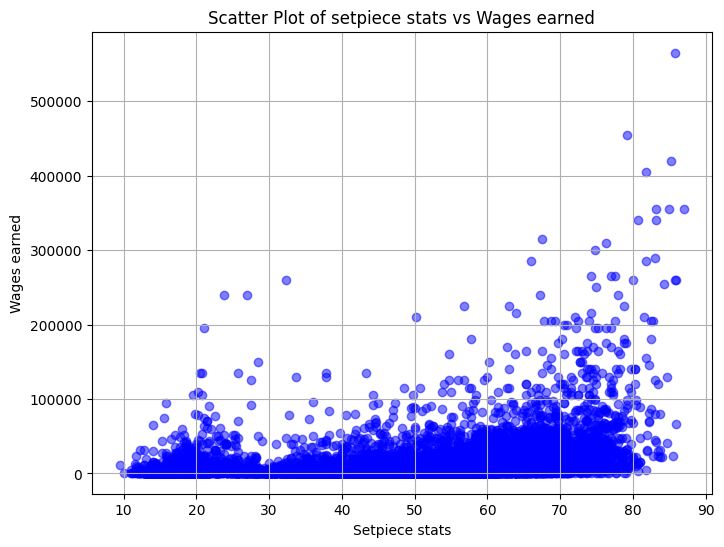

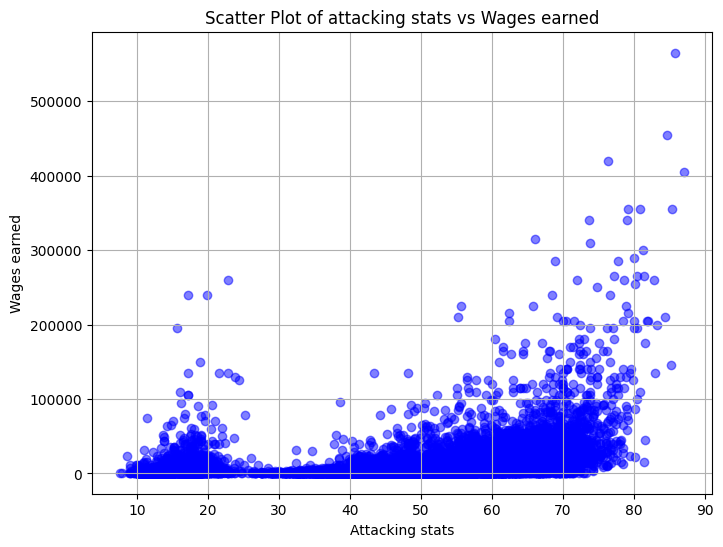

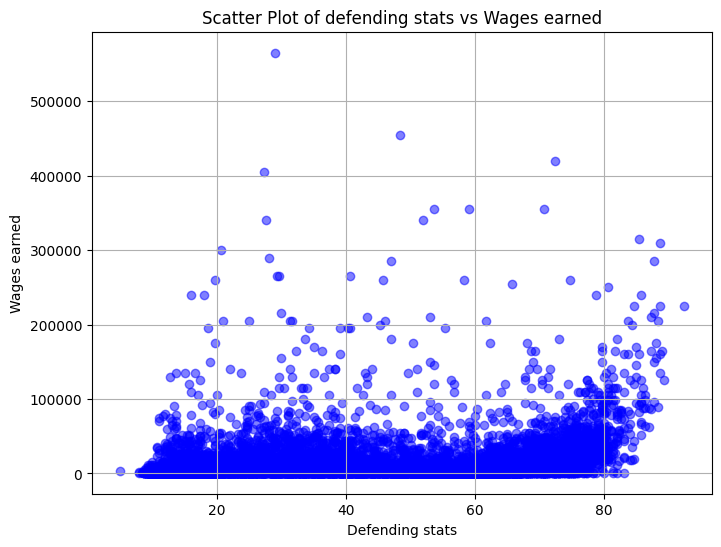

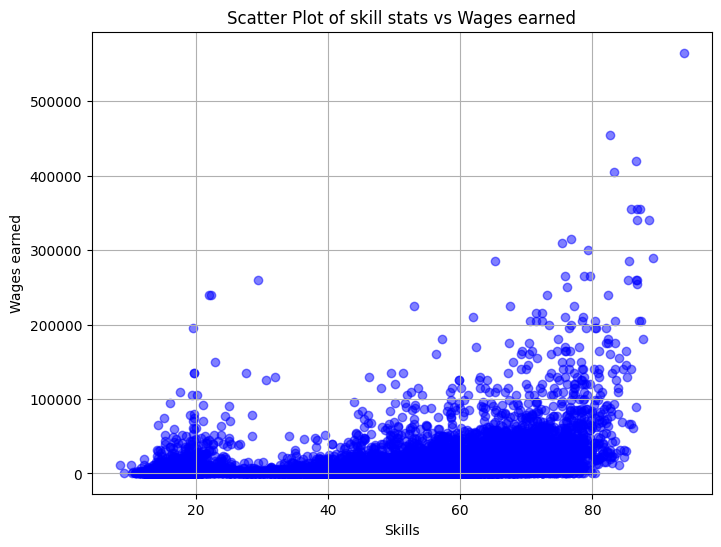

In [80]:
#setpieces vs wages
plt.figure(figsize=(8, 6))
plt.scatter(df['setpiece_stats'], df['wage_euro'], color='blue', alpha=0.5)

plt.xlabel('Setpiece stats')
plt.ylabel('Wages earned')
plt.title('Scatter Plot of setpiece stats vs Wages earned')

plt.grid(True)
plt.show()

#attacking vs wages
plt.figure(figsize=(8, 6))
plt.scatter(df['attacking_stats'], df['wage_euro'], color='blue', alpha=0.5)

plt.xlabel('Attacking stats')
plt.ylabel('Wages earned')
plt.title('Scatter Plot of attacking stats vs Wages earned')

plt.grid(True)
plt.show()

#defending vs wages
plt.figure(figsize=(8, 6))
plt.scatter(df['defending_stats'], df['wage_euro'], color='blue', alpha=0.5)

plt.xlabel('Defending stats')
plt.ylabel('Wages earned')
plt.title('Scatter Plot of defending stats vs Wages earned')

plt.grid(True)
plt.show()

#skills vs wages
plt.figure(figsize=(8, 6))
plt.scatter(df['skill_stats'], df['wage_euro'], color='blue', alpha=0.5)

plt.xlabel('Skills')
plt.ylabel('Wages earned')
plt.title('Scatter Plot of skill stats vs Wages earned')

plt.grid(True)
plt.show()

## 5. Boxplot of wages, market value and primary position

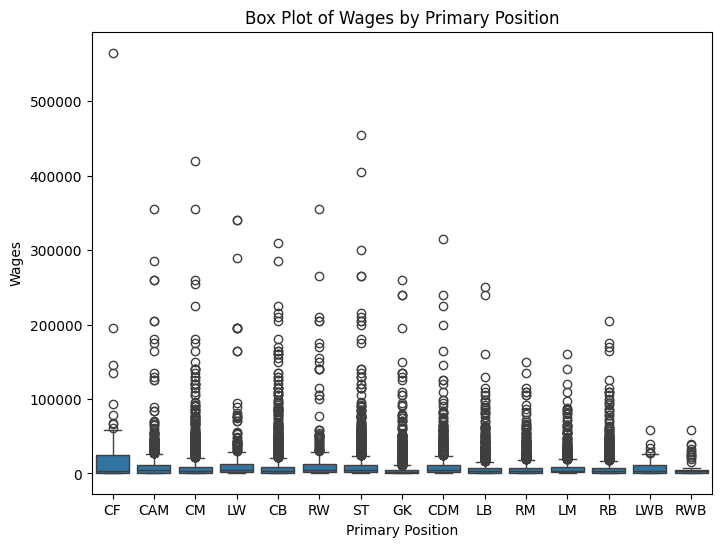

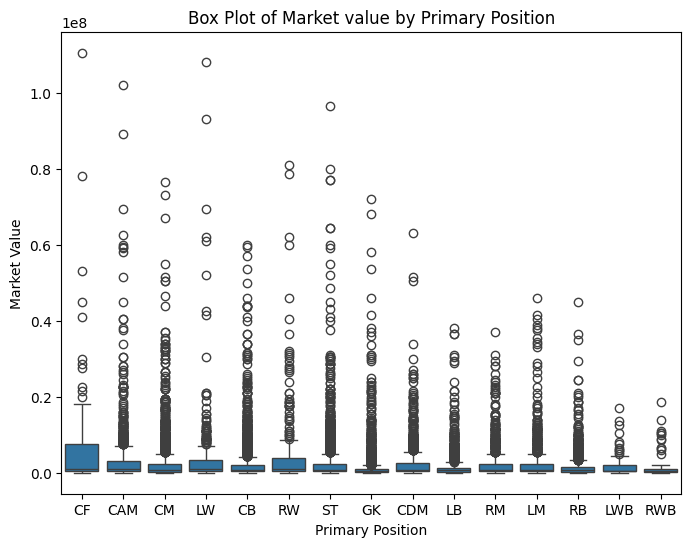

In [81]:
#primary position vs wages
plt.figure(figsize=(8, 6))
sns.boxplot(x='primary_position', y='wage_euro', data=df)

plt.xlabel('Primary Position')
plt.ylabel('Wages')
plt.title('Box Plot of Wages by Primary Position')
plt.show()

#primary position vs market value
plt.figure(figsize=(8, 6))
sns.boxplot(x='primary_position', y='value_euro', data=df)

plt.xlabel('Primary Position')
plt.ylabel('Market Value')
plt.title('Box Plot of Market value by Primary Position')
plt.show()

## 6. Analysis of data with repect to the preferred foot of players

(-1.0999999678434802,
 1.0999999215051353,
 -1.0999999103950653,
 1.0999999957330984)

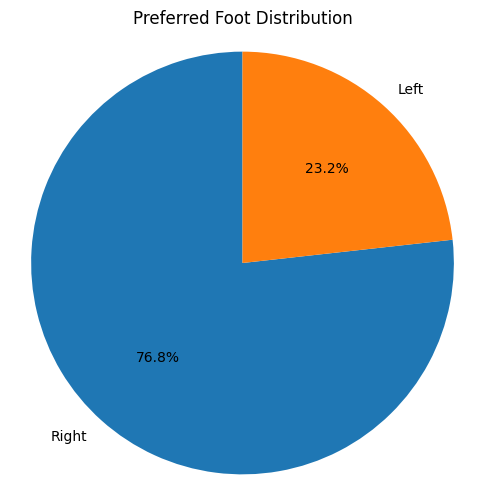

In [82]:
preferred_foot_players = df['preferred_foot'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(preferred_foot_players, labels=preferred_foot_players.index, autopct='%1.1f%%', startangle=90)
plt.title('Preferred Foot Distribution')
plt.axis('equal')

/var/folders/0d/sb9vzr856xg8clnp6z8_j88h0000gn/T/ipykernel_37004/3164514115.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='preferred_foot', y='setpiece_stats', data=df, estimator=np.mean, ci=None)


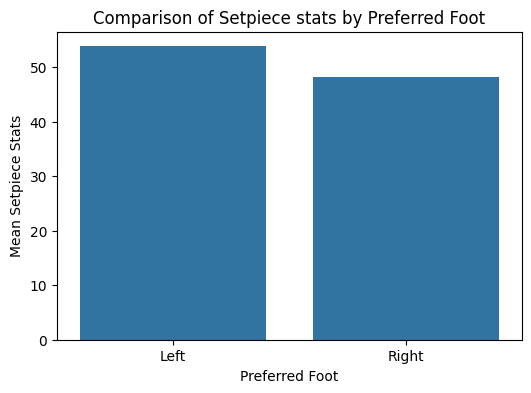

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(x='preferred_foot', y='setpiece_stats', data=df, estimator=np.mean, ci=None)
plt.xlabel('Preferred Foot')
plt.ylabel('Mean Setpiece Stats')
plt.title('Comparison of Setpiece stats by Preferred Foot')
plt.show()

## 7. Correlation Matrix

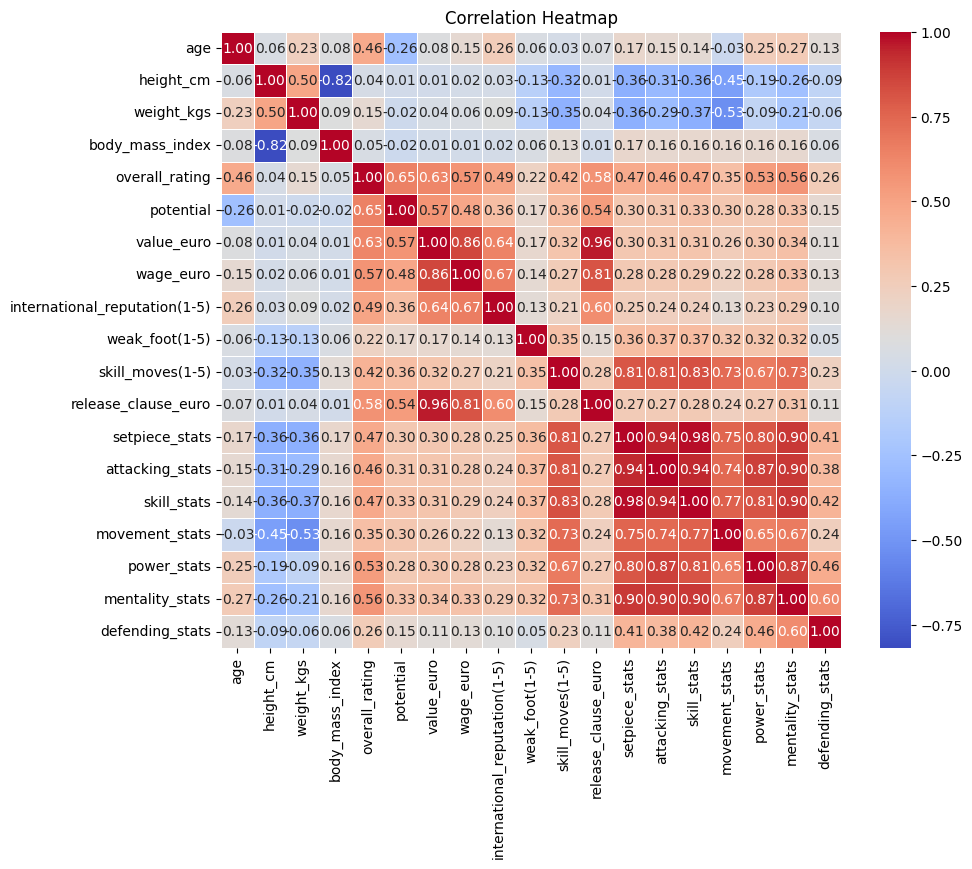

In [84]:
matrix_columns = df.select_dtypes(include=[np.number])
correlation_matrix = matrix_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 8. Joint plot to see how market values and wages vary with other variables

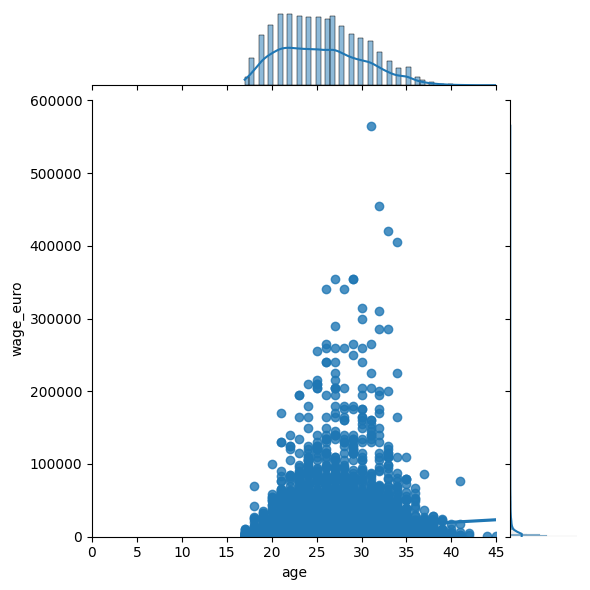

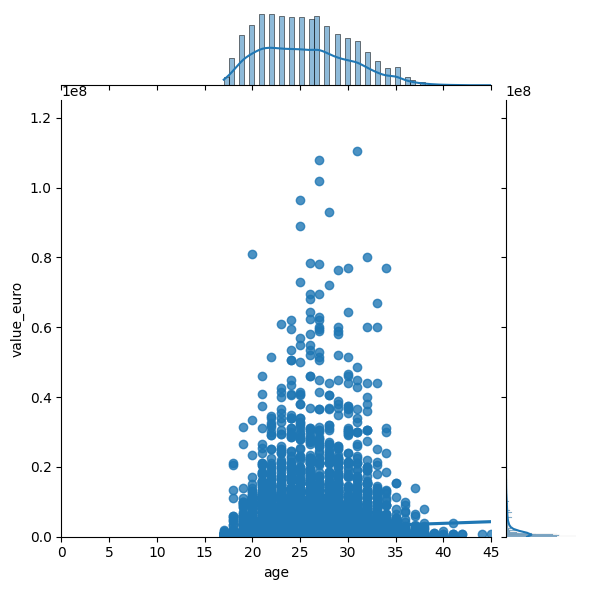

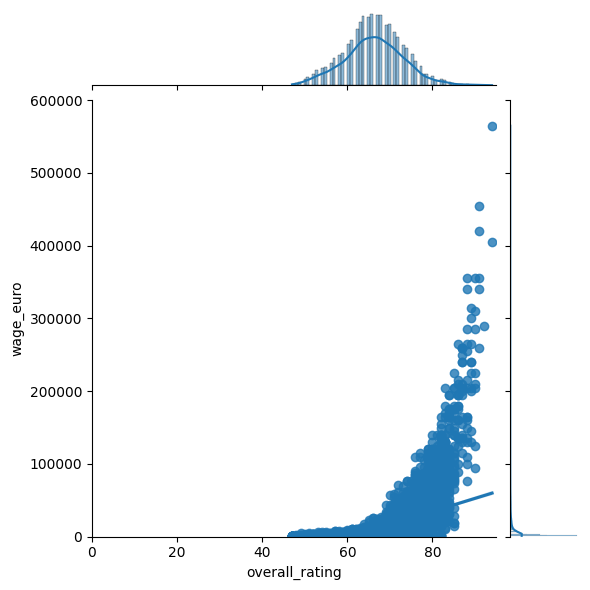

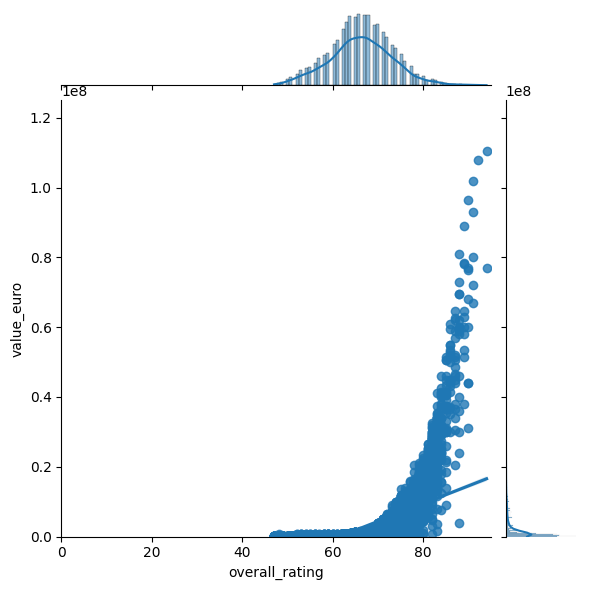

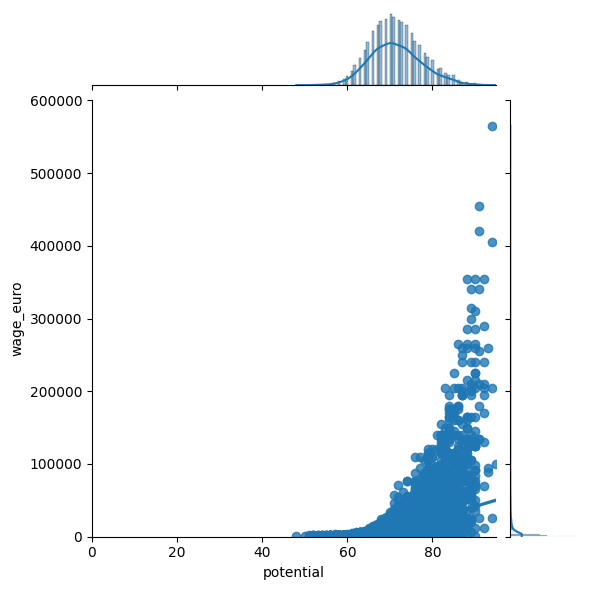

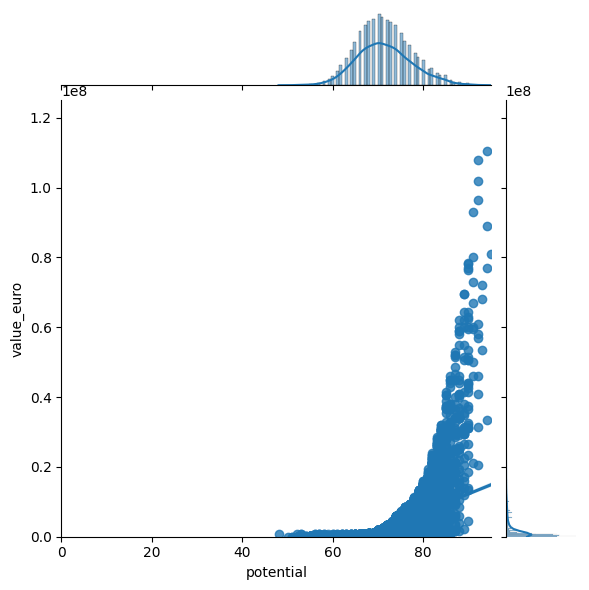

In [85]:
#joint plot of age vs wages
age_limit = 45
wage_eur_limit = 6*10**5
sns.jointplot(x="age",
              y="wage_euro",
              data=df,
              kind="reg",
              xlim=(0,age_limit),
              ylim=(0,wage_eur_limit))
plt.show()

#joint plot of age vs market value
age_limit = 45
value_eur_limit = 1.25*10**8
sns.jointplot(x="age",
              y="value_euro",
              data=df,
              kind="reg",
              xlim=(0,age_limit),
              ylim=(0,value_eur_limit))
plt.show()

#joint plot of rating vs wages
rating_limit = 95
wage_eur_limit = 6*10**5
sns.jointplot(x="overall_rating",
              y="wage_euro",
              data=df,
              kind="reg",
              xlim=(0,rating_limit),
              ylim=(0,wage_eur_limit))
plt.show()

#joint plot of rating vs value
rating_limit = 95
value_eur_limit = 1.25*10**8
sns.jointplot(x="overall_rating",
              y="value_euro",
              data=df,
              kind="reg",
              xlim=(0,rating_limit),
              ylim=(0,value_eur_limit))
plt.show()

#joint plot of potential vs wages
potential_limit = 95
wage_eur_limit = 6*10**5
sns.jointplot(x="potential",
              y="wage_euro",
              data=df,
              kind="reg",
              xlim=(0,potential_limit),
              ylim=(0,wage_eur_limit))
plt.show()

#joint plot of potential vs value
potential_limit = 95
value_eur_limit = 1.25*10**8
sns.jointplot(x="potential",
              y="value_euro",
              data=df,
              kind="reg",
              xlim=(0,potential_limit),
              ylim=(0,value_eur_limit))
plt.show()

## 9. Analysis of data with nationality of the players

(-1.0999999517611756,
 1.099999997640588,
 -1.0999999999111831,
 1.0999999999957706)

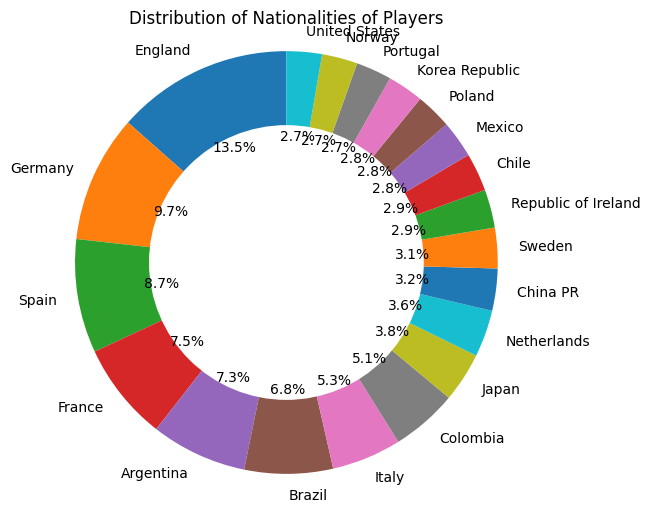

In [86]:
nationalities_players = df['nationality'].value_counts().head(20)

plt.figure(figsize=(6, 6))
plt.pie(nationalities_players, labels=nationalities_players.index, autopct='%1.1f%%', startangle=90)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Distribution of Nationalities of Players')
plt.axis('equal')

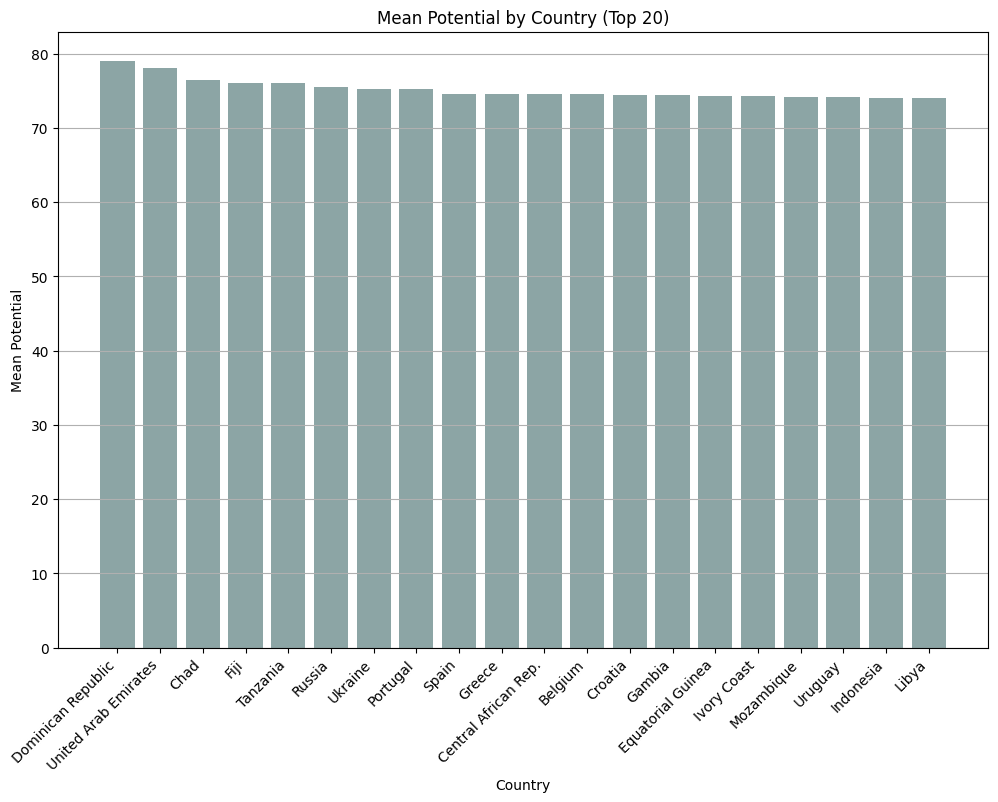

In [87]:
mean_player_potential = df.groupby('nationality')['potential'].mean()

countries_20 = mean_player_potential.nlargest(20)

color = (0.1, 0.3, 0.3, 0.5) 

plt.figure(figsize=(12, 8))
plt.bar(countries_20.index, countries_20.values, color=color)
plt.xlabel('Country')
plt.ylabel('Mean Potential')
plt.title('Mean Potential by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y') 
plt.show()

## 10. Analysis of body mass index with age, nationality, primary position

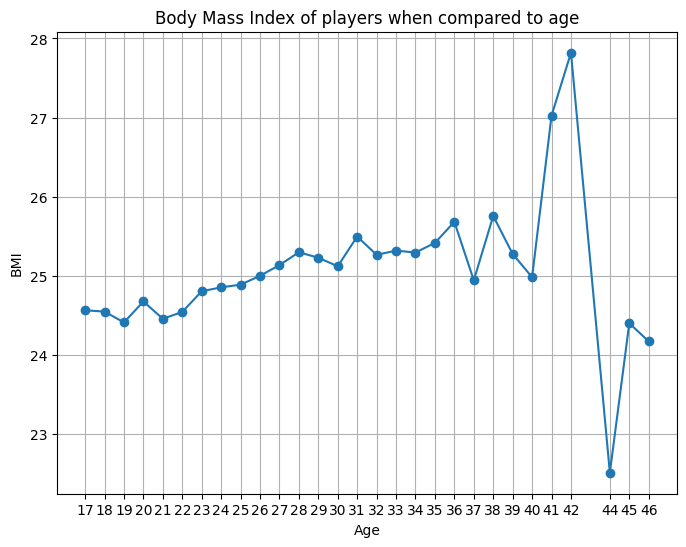

In [88]:
mean_bmi = df.groupby('age')['body_mass_index'].mean()

plt.figure(figsize=(8, 6))
mean_bmi.plot(marker='o', linestyle='-')
plt.title('Body Mass Index of players when compared to age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.xticks(mean_bmi.index)
plt.show()

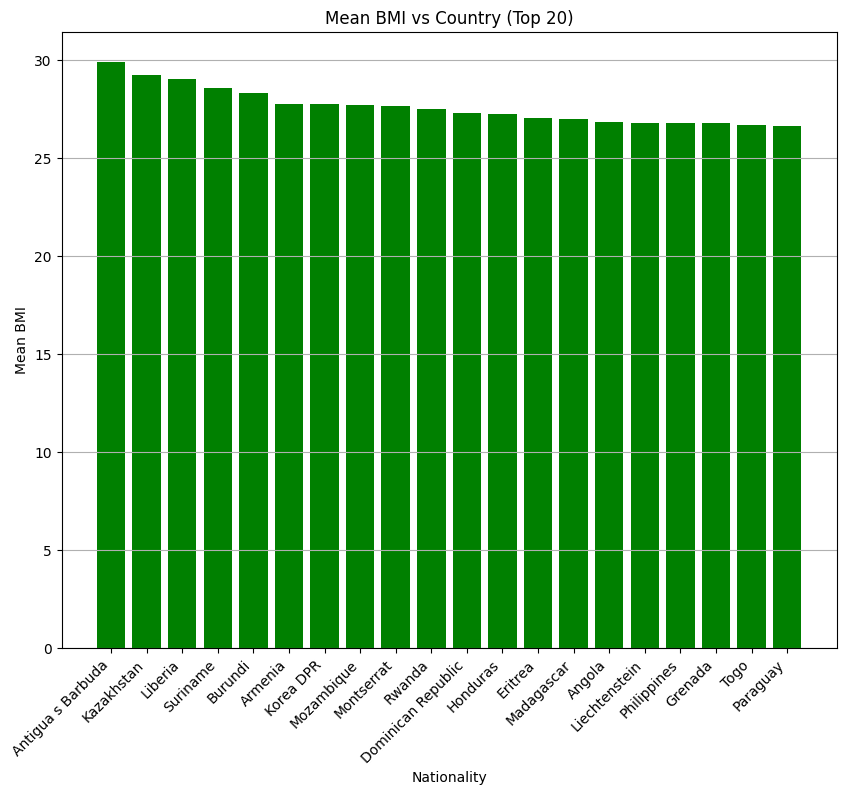

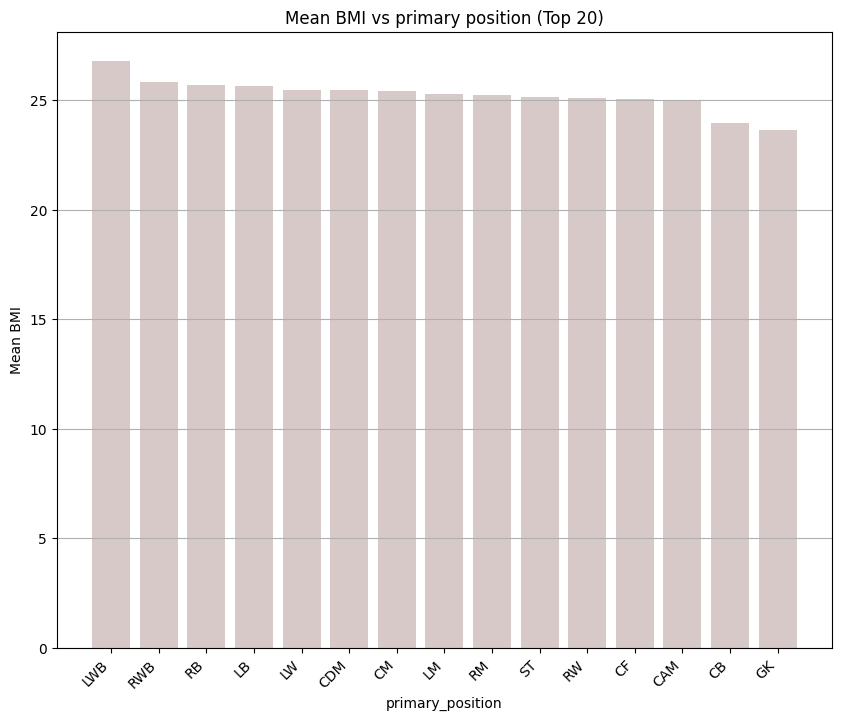

In [89]:
#BMI vs nationality of the players
mean_player_bmi = df.groupby('nationality')['body_mass_index'].mean()

countries_20 = mean_player_bmi.nlargest(20) 

plt.figure(figsize=(10, 8))
plt.bar(countries_20.index, countries_20.values, color='green')
plt.xlabel('Nationality')
plt.ylabel('Mean BMI')
plt.title('Mean BMI vs Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y') 
plt.show()

#BMI vs primary position of the players

mean_player_bmi = df.groupby('primary_position')['body_mass_index'].mean()

countries_20 = mean_player_bmi.nlargest(20) 
color = (0.5, 0.3, 0.3, 0.3)

plt.figure(figsize=(10, 8))
plt.bar(countries_20.index, countries_20.values, color=color)
plt.xlabel('primary_position')
plt.ylabel('Mean BMI')
plt.title('Mean BMI vs primary position (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y') 
plt.show()

In [90]:
df.to_csv('football_clean.csv')